In [1]:
from __future__ import print_function, division
from builtins import range, input

In [1]:
import util 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
from sklearn.mixture import BayesianGaussianMixture

In [2]:
class BayesClassifier :
    def fit(self, X, Y) :
        
        #classes are numbered 0...K-1
        self.K = len(set(Y))
        
        self.gaussians = []
        for k in range(self.K) :
            Xk = X[Y == k]
            gmm = BayesianGaussianMixture(n_components=10) #max clusters
            gmm.fit(Xk)
            self.gaussians.append(gmm)
            
    def sample_given_Y(self, y) :
        gmm = self.gaussians[y]
        sample = gmm.sample()
        #returns a tuple of 2 things -
        # 1) the sample
        # 2) which cluster it came from
        mean = gmm.means_[sample[1]]
        return sample[0].reshape(28, 28), mean.reshape(28, 28)
    
    def sample(self) :
        y = np.random.randint(self.K)
        return self.sample_given_Y(y)

Reading in and transforming data...
here


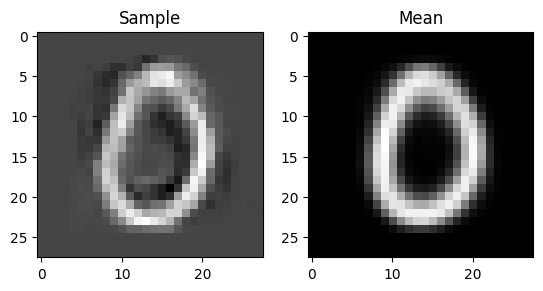

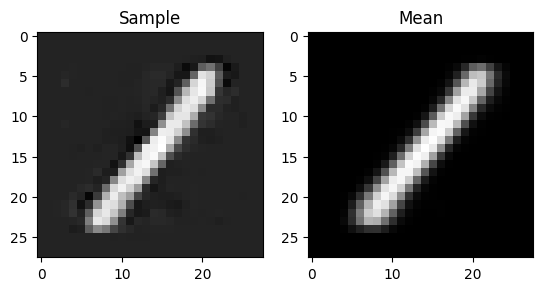

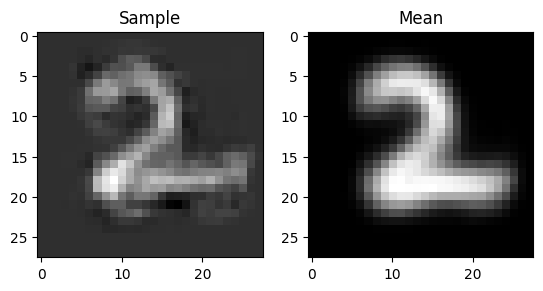

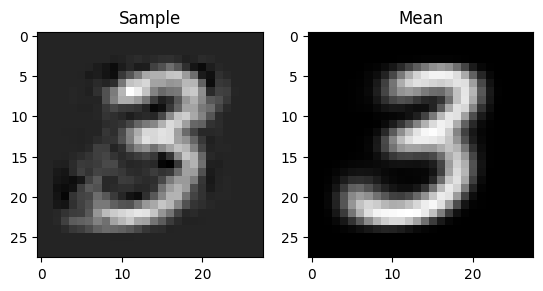

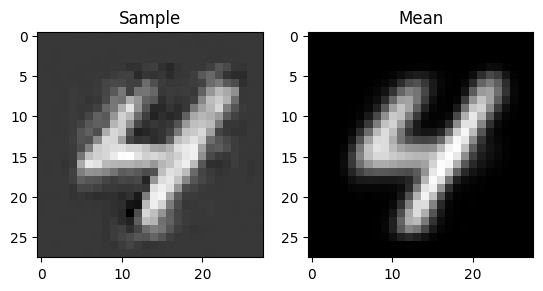

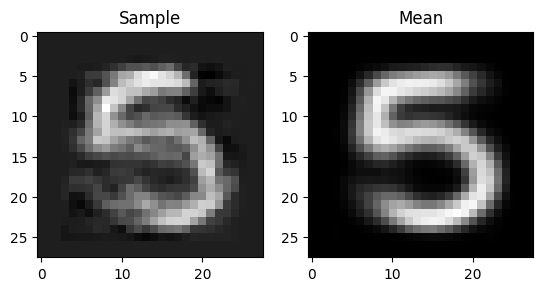

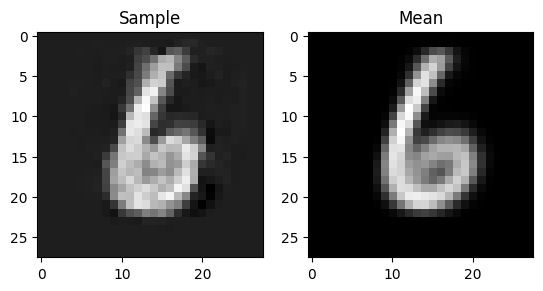

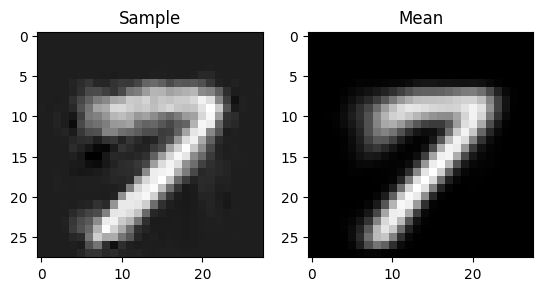

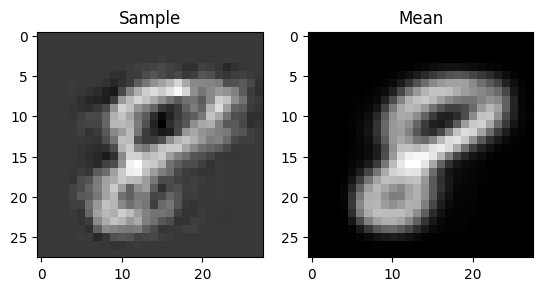

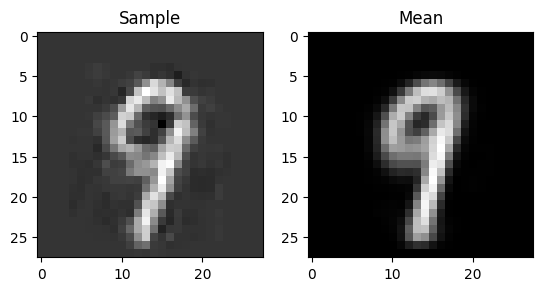

In [3]:
if __name__ == '__main__' :
    X, Y = util.get_mnist()  #shape of X = (42000, 784), Y = (42000,)
    clf = BayesClassifier()
    clf.fit(X, Y)
    print('here')
    
    for k in range(clf.K) :
        #show one sample for each class
        #also show the mean image learned
        sample, mean = clf.sample_given_Y(k)
        plt.subplot(1, 2, 1)
        plt.imshow(sample, cmap = 'gray')
        plt.title('Sample')
        plt.subplot(1, 2, 2)
        plt.imshow(mean, cmap = 'gray')
        plt.title('Mean')
        plt.show()
        

Text(0.5, 1.0, 'Random sample from random class')

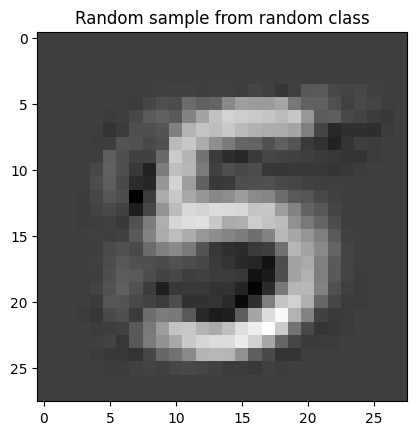

In [4]:
sample, _ = clf.sample()
plt.imshow(sample, cmap = 'gray')
plt.title('Random sample from random class')